# Inputs

In [82]:
import numpy as np
import matplotlib.pyplot as plt

from keras import Input

from keras import layers,Model
from keras.utils import load_img, img_to_array, image_dataset_from_directory

from keras.callbacks import EarlyStopping

# Datasets

In [83]:
train_dataset = image_dataset_from_directory(
    './Data_lab_3/Train',
    image_size = (200,200),
    batch_size = 2
)
test_dataset = image_dataset_from_directory(
    './Data_lab_3/Test',
    image_size = (200,200),
    batch_size = 2
)
validation_dataset = image_dataset_from_directory(
    './Data_lab_3/Val',
    image_size = (200,200),
    batch_size = 2
)

Found 186 files belonging to 2 classes.
Found 170 files belonging to 2 classes.
Found 168 files belonging to 2 classes.


# Main

## Model

In [98]:
inputs = Input(shape=(200,200,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=8,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

In [99]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)

In [100]:
early_stop = EarlyStopping(
    monitor = 'vall_accuracy', 
    patience = 7, 
    mode = 'max', 
    verbose = 1
)

callbacks_list = [early_stop]

## Learning

In [101]:
history = model.fit(
    train_dataset,
    epochs = 12,
    callbacks = callbacks_list,
    validation_data = validation_dataset,
    shuffle = False
)

Epoch 1/12
93/93 [==============================] - 6s 47ms/step - loss: 0.6996 - accuracy: 0.5215 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/12
93/93 [==============================] - 4s 46ms/step - loss: 0.6982 - accuracy: 0.5215 - val_loss: 0.6925 - val_accuracy: 0.6012
Epoch 3/12
93/93 [==============================] - 4s 45ms/step - loss: 0.6978 - accuracy: 0.4946 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/12
93/93 [==============================] - 5s 49ms/step - loss: 0.6933 - accuracy: 0.4462 - val_loss: 0.6931 - val_accuracy: 0.6607
Epoch 5/12
93/93 [==============================] - 5s 52ms/step - loss: 0.6932 - accuracy: 0.4731 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/12
93/93 [==============================] - 5s 51ms/step - loss: 0.6932 - accuracy: 0.4624 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 7/12
93/93 [==============================] - 4s 47ms/step - loss: 0.6930 - accuracy: 0.5323 - val_loss: 0.6924 - val_accuracy: 0.5774
Epoch 8/12
93

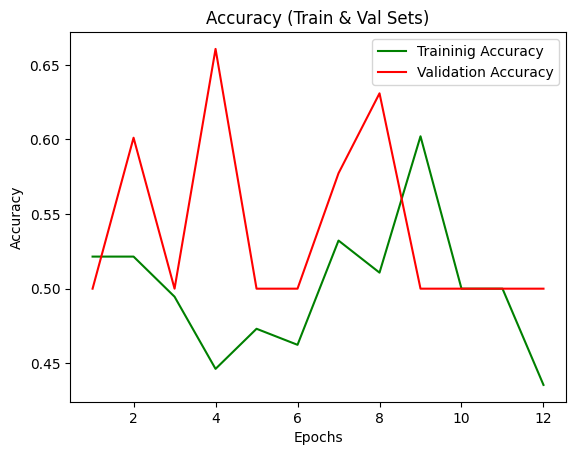

In [102]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs=range(1,len(accuracy)+1)

plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,accuracy,color='green',label='Traininig Accuracy')
plt.plot(epochs,val_accuracy,color='red',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [103]:
model.evaluate(test_dataset)

85/85 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.4882


[0.6931470632553101, 0.4882352948188782]

## Testing

### One picture

#### Women

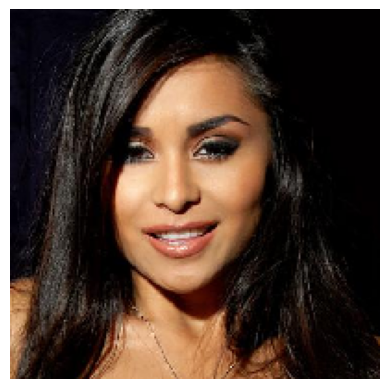

In [90]:
test_image = load_img(
    './Data_lab_3/Test/Women/13016000_1987-01-20_2009.jpg', 
    target_size=(200, 200)
)

plt.axis('off')
plt.imshow(test_image)

In [91]:
x = img_to_array(test_image)
x.shape

x = np.expand_dims(x, axis=0)
prediction=model.predict(x)

1/1 [==============================] - 0s 279ms/step


In [92]:
if round(prediction[0][0]) == 1:
    print('Women')
else:
    print('Men')

Women


#### Men

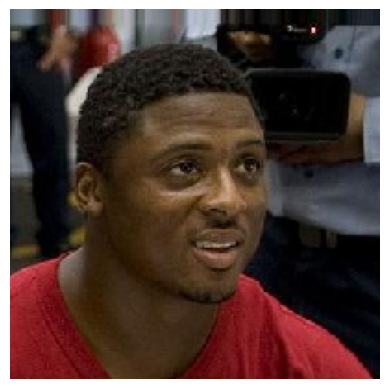

In [93]:
test_image = load_img(
    './Data_lab_3/Test/Men/1285200_1975-01-05_2009.jpg', 
    target_size=(200, 200)
)

plt.axis('off')
plt.imshow(test_image)

In [104]:
x = img_to_array(test_image)
x.shape

x = np.expand_dims(x, axis=0)
prediction=model.predict(x)

1/1 [==============================] - 0s 233ms/step


In [105]:
if round(prediction[0][0]) == 1:
    print('Women')
else:
    print('Men')

Men


### All test dataset

In [96]:
prediction = model.predict(test_dataset)

85/85 [==============================] - 7s 26ms/step


## Results

In [97]:
women_counter = 0
men_counter = 0

for pred in prediction:
    if round(pred[0]) == 1:
        women_counter += 1
    else:
        men_counter += 1

print(
    'Women: ', women_counter / round((women_counter+men_counter)/2), ' | ', women_counter, '\n',
    'Men: ', men_counter / round((women_counter+men_counter)/2), ' | ', men_counter,    
)

Women:  1.035294117647059  |  88 
 Men:  0.9647058823529412  |  82
